## Is it actually possible to understand the online customer sentiment?

## Sentiment analysis is a growing field at the intersection of linguistics and computer science, which attempts to automatically determine the sentiment, or positive/negative opinion, contained in text. Sentiment can be characterized as positive or negative evaluation expressed through language. Common applications of sentiment analysis include the automatic determination of whether a review posted online (of a movie, a book, or a consumer product) is positive or negative towards the item being reviewed. Sentiment analysis is now a common tool in the repertoire of social media analysis carried out by companies, marketers and political analysts. Research on sentiment analysis extracts information from positive and negative words in text, from the context of those words, and the linguistic structure of the text. This brief survey examines in particular the contributions that linguistic knowledge can make to the problem of automatically determining sentiment.

In [4]:
# Loading the nescessary natural lagnugage toolkit package for the analyis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

In [5]:
# Read in data

df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [6]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

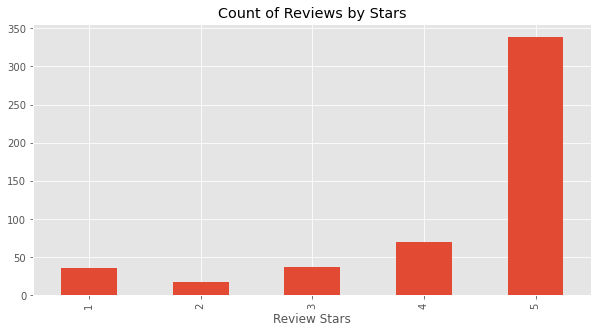

In [7]:
# Exploring the dataset to find out the count of each start rating from 1-5.

ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
# Basic NLTK stuff to get the texts and sentiment from each text.
# Example of a random review from the dataset

example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [9]:
# Splitting the sentence into a set of words. 

tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
# Getting the part of speech of each word. 

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [11]:
# Grouping the tagged token into chunks of sentence

entities = nltk.chunk.ne_chunk(tagged)
#entities.pprint()

# The main goal is to determine whether a text, or a part of it, is subjective or not and, if subjective, whether it expresses a positive or a negative view. The direction of the opinion (i.e., whether positive or negative) is sometimes referred to as semantic orientation. I am determining the text’s polarity, which means deciding if a given subjective text/review expresses a positive or negative opinion on its subject matter and determining the strength of the text’s polarity.

In [12]:
# Setting up the function for sentiment scoring to get the neg/neu/pos scores of the text.

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [15]:
# Example of a postive sentiment 

sia.polarity_scores('I am happy!')

{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6114}

In [18]:
# Example of a negative sentiment 

sia.polarity_scores('This is bad.')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [19]:
# Example from the dataset that we used in [ln 8].

sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
''' Since we were able to get the sentiment of the example test, running the polarity score on 
the entire dataset, this will set the polarity of each sentence from the entire data set. ''' 

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [23]:
# Now we have sentiment score and metadata of the entire dataset.

vaders.head(2)

Id    neg    neu    pos  compound   ProductId          UserId ProfileName  \
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW  delmartian   
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK      dll pa   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...

# Testing a few random sentiments from the dataset to see if it actually works.

In [24]:
example1 = df['Text'][92]
example2 = df['Text'][27]
example3 = df['Text'][172]
example4 = df['Text'][230]

def polarity_test(x):
    print(x)
    return sia.polarity_scores(x)
polarity_test(example2)

I was so glad Amazon carried these batteries.  I have a hard time finding them elsewhere because they are such a unique size.  I need them for my garage door opener.<br />Great deal for the price.


{'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956}

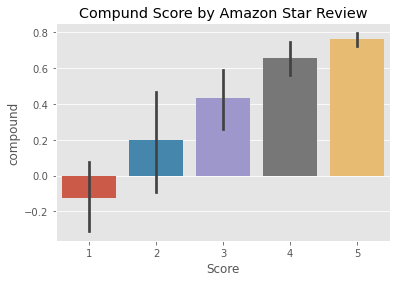

In [25]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

## By using Vader model we are getting the polarity of each word from the sentences. This brings us to a disadvantage. As human language depends a lot on context, for instances there might be reviews where we see negative words but contributing to a positive sentiment or maybe even a sarcastic comment would simple not work for this model.

## Recently more and more deep learning models are being used to tackle this type of contexual issues. Those models not only accounts for the words but also the context related to other words as well. The sentimental analysis goes deyond polarity, so given I had more time I would research more into deep learning and try to solve the contextual issue. 

## The main goal of sentiment analysis is to detect the emotional reactions hiddent behind the text, which will in turn give insight of the customer satisfaction. Sentiment anaylsis can be used in various situation like, identifying emotional trigger , reducing customer churn, filtering out the profanity and many more. There are many more benefits of sentiment analysis but the major one that I focused on this project is to understand the emotion towards their amazon purchase. 